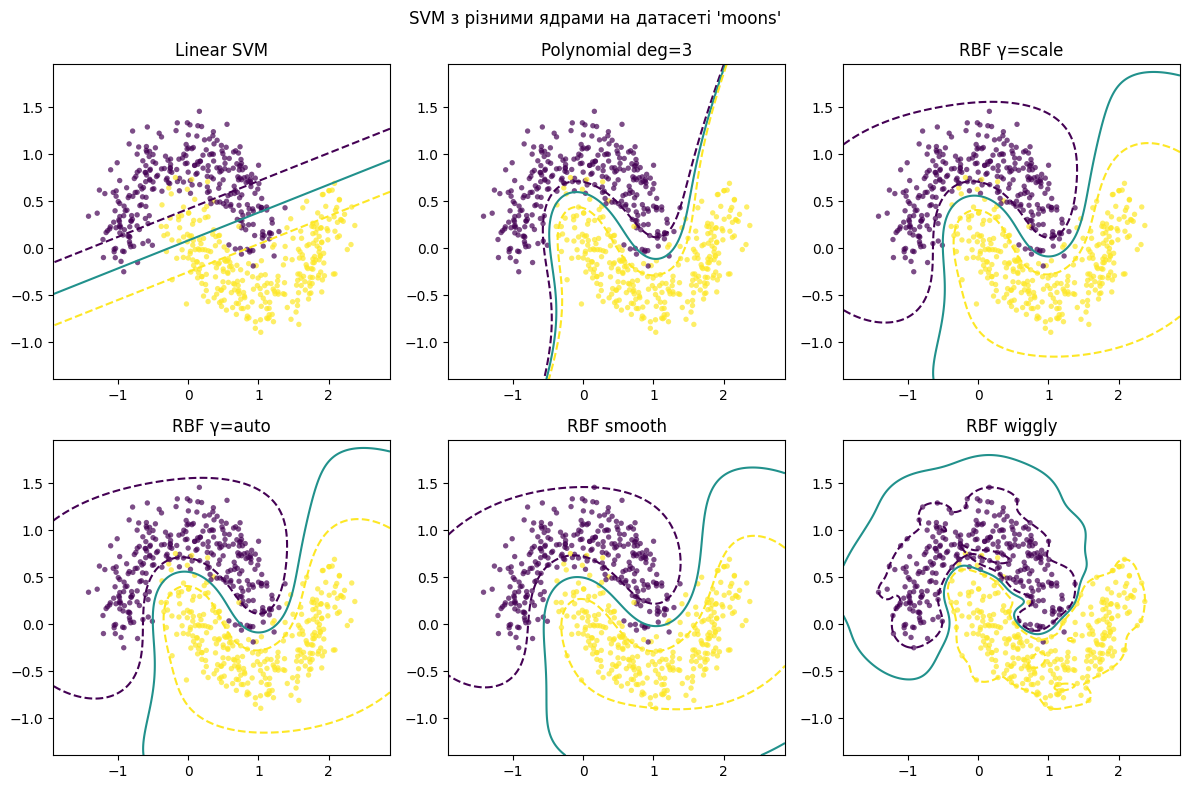

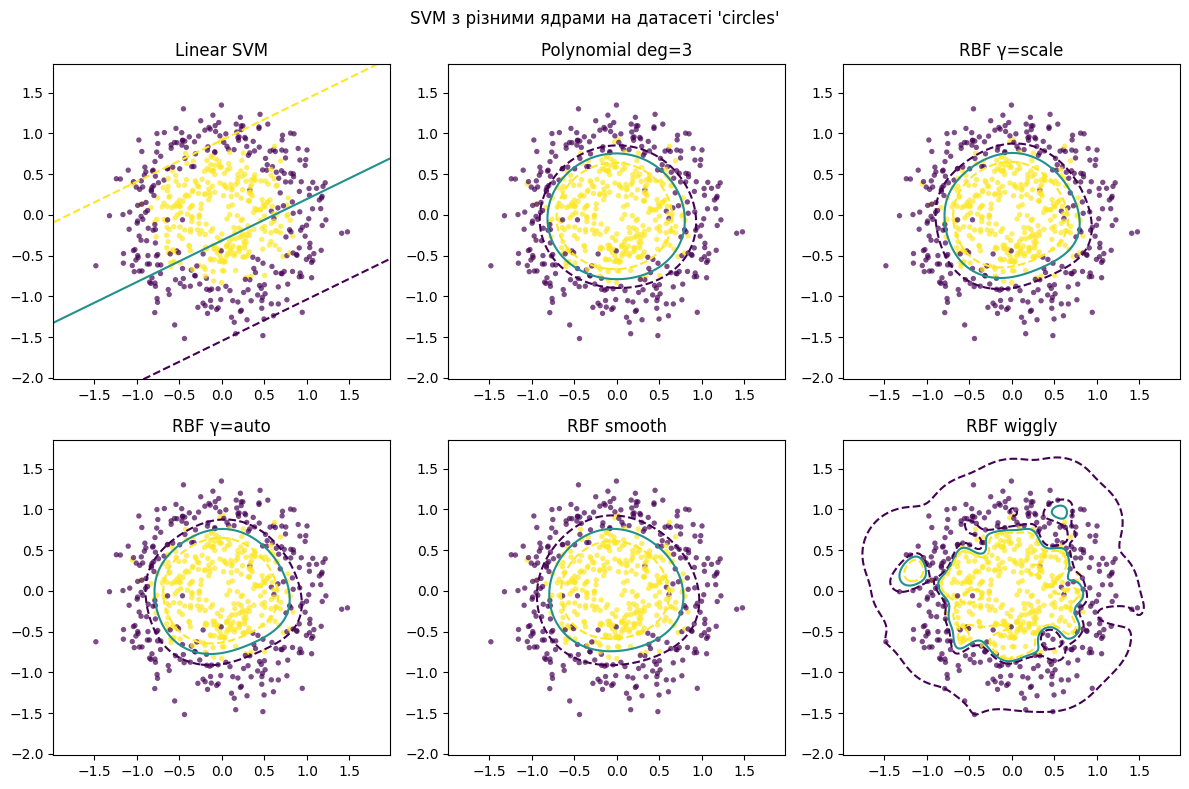

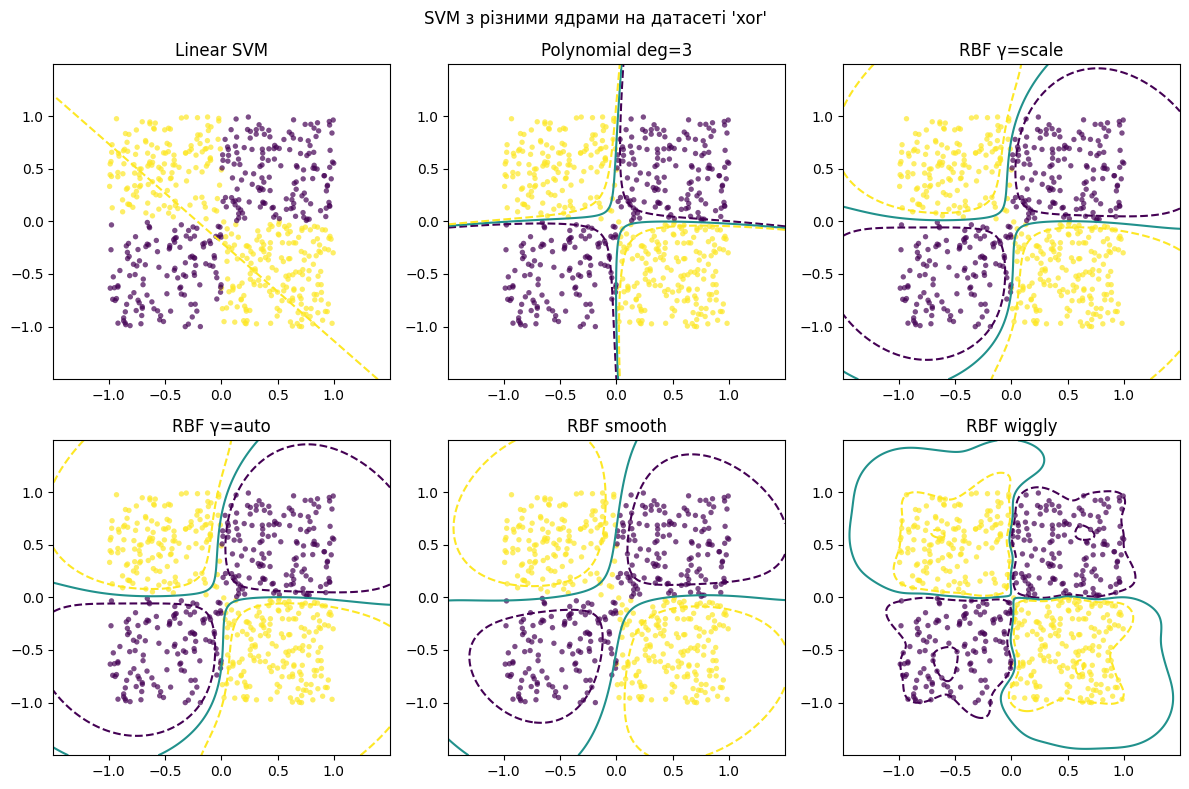

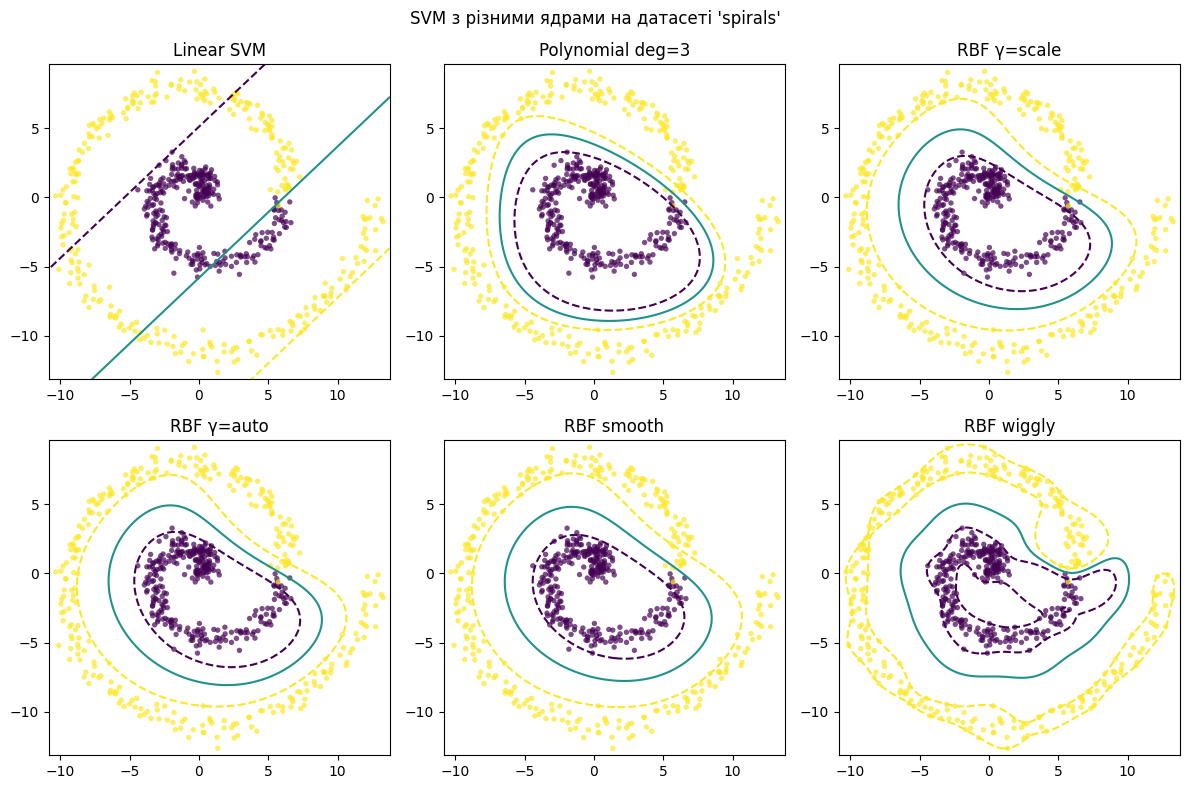

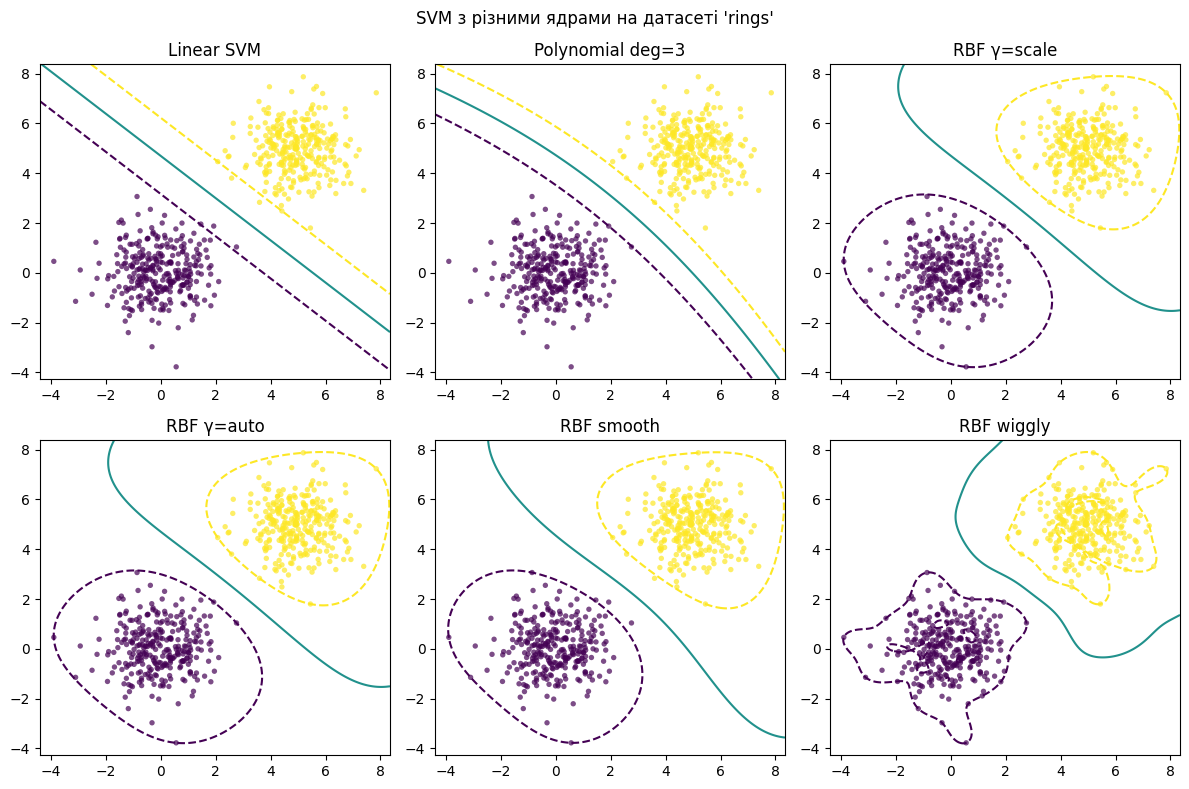

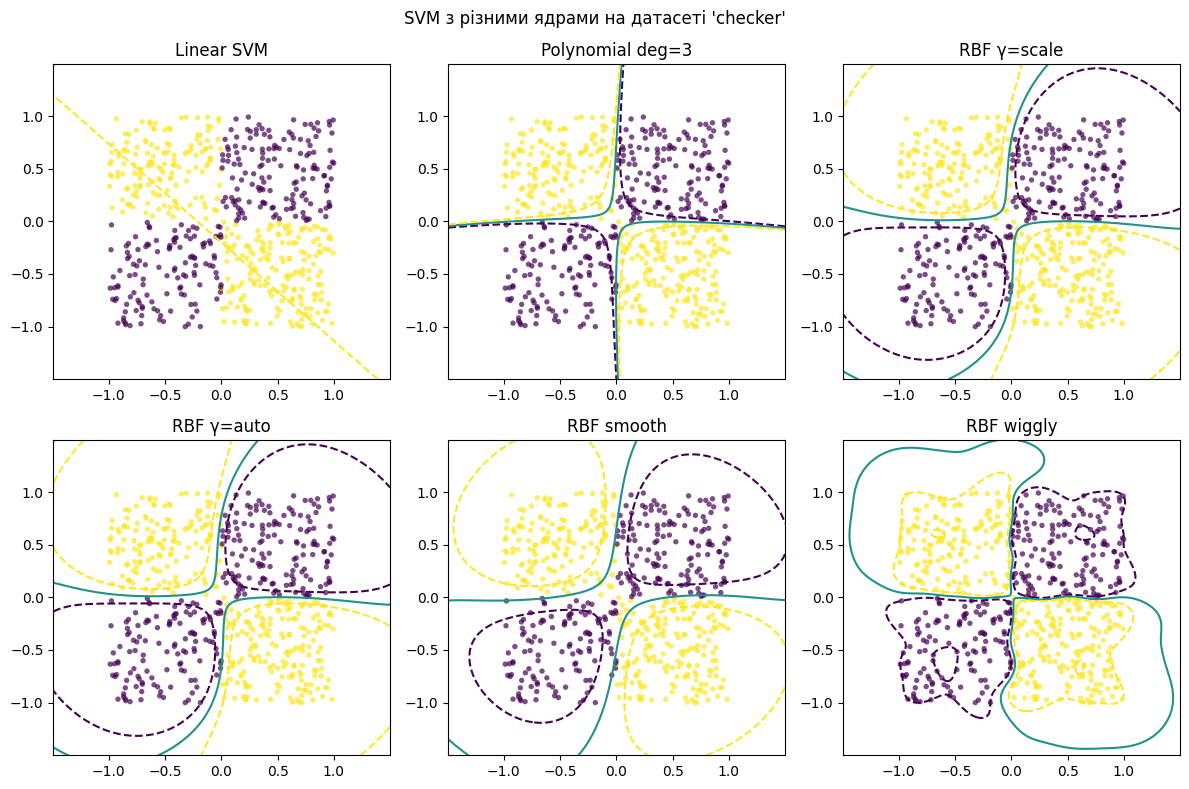

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification

def generate_dataset(name, n_samples=600, random_state=0):
    """
    Генерує синтетичні датасети: moons, circles, xor, spirals, rings, checker
    """
    rng = np.random.default_rng(random_state)
    
    if name == "moons":
        X, y = make_moons(n_samples=n_samples, noise=0.2, random_state=random_state)
    elif name == "circles":
        X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.2, random_state=random_state)
    elif name == "xor":
        X = rng.uniform(-1, 1, (n_samples, 2))
        y = np.logical_xor(X[:,0] > 0, X[:,1] > 0).astype(int)
    elif name == "spirals":
        t = np.linspace(0, 4*np.pi, n_samples)
        r = t
        X = np.c_[r*np.cos(t), r*np.sin(t)]
        y = np.array([0 if i < n_samples/2 else 1 for i in range(n_samples)])
        X += rng.normal(scale=0.5, size=X.shape)
    elif name == "rings":
        X_inner = rng.normal(loc=0.0, scale=1.0, size=(n_samples//2,2))
        X_outer = rng.normal(loc=5.0, scale=1.0, size=(n_samples//2,2))
        X = np.vstack([X_inner, X_outer])
        y = np.array([0]*(n_samples//2) + [1]*(n_samples//2))
    elif name == "checker":
        X = rng.uniform(-1, 1, (n_samples, 2))
        y = ((X[:,0] > 0) ^ (X[:,1] > 0)).astype(int)
    else:
        raise ValueError(f"Unknown dataset: {name}")
    
    return X, y

def create_models():
    """
    Створює список моделей SVM з різними ядрами та параметрами
    """
    models = [
        ("Linear SVM", make_pipeline(StandardScaler(), SVC(kernel="linear", C=1.0))),
        ("Polynomial deg=3", make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, C=5.0, coef0=1.0, gamma="scale"))),
        ("RBF γ=scale", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=5.0, gamma="scale"))),
        ("RBF γ=auto", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=5.0, gamma="auto"))),
        ("RBF smooth", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma=0.5))),
        ("RBF wiggly", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=50.0, gamma=5.0))),
    ]
    return models

def plot_decision(ax, model, X, y, title):
    """
    Візуалізує межі рішень SVM та дані
    """
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                         np.linspace(y_min, y_max, 400))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"])
    ax.scatter(X[:,0], X[:,1], c=y, s=15, alpha=0.7, edgecolor="none")
    ax.set_title(title)

def run_svm_on_datasets(datasets, n_samples=600, random_seed=0):
    """
    Навчає SVM на різних синтетичних датасетах та візуалізує результати
    """
    models = create_models()
    
    for dataset_name in datasets:
        X, y = generate_dataset(dataset_name, n_samples, random_seed)
        
        fig, axes = plt.subplots(2, 3, figsize=(12, 8))
        axes = axes.ravel()
        
        for ax, (name, clf) in zip(axes, models):
            clf.fit(X, y)
            plot_decision(ax, clf, X, y, name)
        
        plt.suptitle(f"SVM з різними ядрами на датасеті '{dataset_name}'")
        plt.tight_layout()
        plt.show()

# Запуск
datasets_list = ["moons", "circles", "xor", "spirals", "rings", "checker"]
run_svm_on_datasets(datasets_list)
